# Tarea N°3


<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Profesor: Tomás Fontecilla </em><br>

</div>

# Machine Learning: Laboratorio 03
*12 de Octubre de 2024*

**Nombre Estudiante(s)**: `Gabriel Álvarez Martínez - Valeska Farías Caicedo - Constanza Perez Pulido - Rosario Valderrama Labarca


## 1. Objetivo

En este laboratorio deberá *aplicar* los algoritmos aprendidos en la clase e investigar del uso de la libreria python scikit-learn y sus funciones más útiles para estos métodos. Su meta es realizar un análisis de datos completo probando los distintos métodos supervisados vistos hasta ahora (Naive Bayes, Análisis de Discriminante, Regresión Logística).

Para esto utilizará la base load_breast_cancer anteriormente utilizada. Además los siguientes comandos de la librería sklearn, para la siguiente base:

```
# X, y =fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
X.drop(['boat', 'body', 'home.dest'], axis=1, inplace=Tru```
```

Por último, nos gustaría saber el destino de los dos pasajeros de los cuales se presentan sus boletos en el Titanic. También, nos interesa entender si la edad es un elemento determinante para la sobrevida.

## 2. Introducción  

En el presente laboratorio se utilizaron dos dataframe:

- `load_breast_cancer`, con el cual se pretende entrenar un modelo para predecir si el tumor de un paciente es maligno o benigno.
- `titanic`, con el cual se pretender entrenar un modelo para predecir si los pasajeros sobreviven o no.

Para lograr lo anterior, se utilizaron algoritmos de clasificación supervisados, para eso se utilizará Análisis de Discriminante Lineal (LDA) con el primer df (load_breast_cancer) y se realizará una regresión lineal además de  Naive Bayes para el df Titanic.

Adcionalmente, se desea conocer el destino de dos pasajeros en específico que mantienen las siguientes caracteristicas según su ticket de embarque:  

Pasajero N°1:  

  - Nombre: Miss Helene ragnhild Ostby
  - Sexo: Femenino
  - Edad: 22 años
  - Clase en la que viaja: 1ra. clase
  - Cabin: B-36
  - Embarque: Cherbourg  

Pasajero N°2:  
  - Nombre: Mr. Frederick Edward Giles
  - Sexo: Masculino
  - Edad: 21
  - Clase en la que viaja: 2da. clase
  - Cabin: Desconocida
  - Embarque: Southampton  

Para predecir si los dos pasajeros indicados sobreviven o no, se utiliza un árbol de clasificación que será entrenado para identificar las caracteristicas de los pasajeros que sobreviven y los que no, luego de eso podremos determinar el destino de ambos. el destino de ambos.

## 3. Importación de paquetes

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score, precision_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix


## 4. Obtención del Dataset

La descarga del dataset `titanic` se realiza desde OpenML por medio de fetch_openml. Esta función de scikit-learn permite la descarga de datasets desde la plataforma OpenML.

Para este caso, se imprimen las variables predictorias como X_titanic.

### 4.1. load_titanic

El naufragio del Titanic es uno de los eventos más trágicos y conocidos de la historia marítima. En su viaje inaugural, el 15 de abril de 1912, el Titanic, que era en su momento el barco más grande del mundo, colisionó con un iceberg y se hundió en el Océano Atlántico. De los más de 2,200 pasajeros y tripulantes a bordo, solo alrededor de 700 sobrevivieron. Este evento ha sido objeto de muchos estudios y análisis, con el fin de entender mejor los factores que influyeron en la supervivencia de los pasajeros.

El propósito de este dataset es permitir la exploración y el análisis de los factores que pudieron influir en la supervivencia de los pasajeros, tales como su clase de boleto, sexo, edad, entre otros.

Estructura del Dataset:
'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'

In [13]:
X_titanic, y_titanic = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
print(X_titanic.columns)

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


In [14]:
X_titanic.head(5)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#### Descripción de las variables:

- **pclass:**
Clase del boleto del pasajero.
*Valores:*
1: Primera clase
2: Segunda clase
3: Tercera clase

    *Tipo de dato:* Categórico ordinal.

- **name:**
Nombre del pasajero.

    *Tipo de dato:* Categórico nominal.

- **sex:**
Sexo del pasajero.
    *Valores:* "male": Hombre, "female": Mujer

    *Tipo de dato:* Categórico nominal.

- **age:**
Edad del pasajero en años.

    *Tipo de dato:* Numérico continuo.

- **sibsp:**
Número de hermanos y cónyuges a bordo del Titanic.

    *Tipo de dato:* Numérico discreto.

- **parch:**
Número de padres e hijos a bordo del Titanic.

    *Tipo de dato:* Numérico discreto.

- **ticket:**
Número de ticket del pasajero por el boleto.

    *Tipo de dato:* Categórico nominal.

- **fare:**
Tarifa pagada por el pasajero por su billete.

    *Tipo de dato:* Numérico continuo.

- **cabin:**
Identificación de cabina del pasajero a bordo.

    *Tipo de dato:* Categórico nominal.

- **embarked:**
Puerto donde el pasajero embarcó.
*Valores:* "C": Cherburgo, "Q": Queenstown, "S": Southampton

    *Tipo de dato:* Categórico nominal.

- **boat:**
Número de bote que rescató al pasajero luego del hundimiento.

    *Tipo de dato:* Categórico nominal.

- **body:**
Número de cuerpo que se encontró luego del hundimiento.

    *Tipo de dato:* Numérico discreto.

- **home.dest:**
Lugar de destino o lugar de residencia.

    *Tipo de dato:* Categórico nominal.

In [15]:
print("Dimensiones del dataset (filas, columnas):", X_titanic.shape)
print("\nInformación general del dataset:")
print(X_titanic.info())

print("\nValores nulos por columna:")
print(X_titanic.isnull().sum())

Dimensiones del dataset (filas, columnas): (1309, 13)

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
dtypes: category(2), float64(3), int64(3), object(5)
memory usage: 115.4+ KB
None

Valores nulos por columna:
pclass          0
name            0
sex             0
age           263
sibsp   

El dataset contiene 1,309 filas y 13 columnas, representando información sobre los pasajeros del Titanic. A continuación se detalla la estructura general del dataset, incluyendo el tipo de dato de cada columna y la cantidad de valores nulos.

Estructura General del Dataset:
- pclass: Tipo entero (int64), sin valores nulos (1,309 valores).
- name: Tipo de dato object (cadena de texto), sin valores nulos (1,309 valores).
- sex: Tipo categórico (category), sin valores nulos (1,309 valores).
- age: Tipo flotante (float64), con 263 valores nulos.
- sibsp: Tipo entero (int64), sin valores nulos (1,309 valores).
- parch: Tipo entero (int64), sin valores nulos (1,309 valores).
- ticket: Tipo object (cadena de texto), sin valores nulos (1,309 valores).
- fare: Tipo flotante (float64), con 1 valor nulo.
- cabin: Tipo object (cadena de texto), con 1,014 valores nulos, indicando que la mayoría de los pasajeros no tienen un camarote registrado.
- embarked: Tipo categórico (category), con 2 valores nulos.
- boat: Tipo object (cadena de texto), con 823 valores nulos, ya que muchos pasajeros no fueron rescatados en botes.
- body: Tipo flotante (float64), con 1,188 valores nulos, ya que la mayoría de los cuerpos no fueron recuperados.
- home.dest: Tipo object (cadena de texto), con 564 valores nulos.

Cantidad de Valores Nulos por Columna:
- age: 263 valores nulos.
- fare: 1 valor nulo.
- cabin: 1,014 valores nulos.
- embarked: 2 valores nulos.
- boat: 823 valores nulos.
- body: 1,188 valores nulos.
- home.dest: 564 valores nulos.

## 5. Métodos Supervisados
Los métodos de Machine Learning supervisado son aquellos en los que el modelo aprende a partir de un conjunto de datos etiquetados, es decir, donde las características (variables independientes) y la variable objetivo (variable dependiente) ya están definidas. El objetivo del aprendizaje supervisado es que el modelo pueda predecir la salida (o etiqueta) correcta para nuevas instancias basándose en lo que ha aprendido de los datos de entrenamiento.

Para utlizar el df Titanic se debe determinar cómo se manejarán los datos nulos:

 - Identificar qué variables tienen valores nulos
 - Seleccionar el método que se utilizará para imputar los valores nulos

In [16]:
# Se quitan las columnas boat, body y home.dest del dataset
X_titanic.drop(['boat', 'body', 'home.dest'], axis=1, inplace=True)

# Se indentifican las columnas con nulos en X
print(f'Cantidad de elementos nulos en X:\n{X_titanic.isnull().sum()}')

# Se identifica los nulos en y
print(f'Cantidad de elementos nulos en y:\n{y_titanic.isnull().sum()}')

Cantidad de elementos nulos en X:
pclass         0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64
Cantidad de elementos nulos en y:
0


Se observa que la variable **age (edad)** tiene 263 observaciones nulas, **fare** tiene 1, **cabin (cabina)** tiene 1014 y **embarked** tiene 2. Para solucionar ésto utilizaremos imputación de datos con la moda de la variable, y en algunos casos condiconada con otras variables para lograr mayor acertividad.  

- Para *cabin* se utilizará *pclass* y *sex* y se imputará según la moda del grupo.
- Para *age* se utilizará *pclass* , *sex*  y *cabin* y se imputará según la moda del grupo.
- Para *fare* se utilizará la media de la misma variable.

In [17]:
# reemplazamos con la moda según pclass y sex
X_titanic['cabin'] = X_titanic['cabin'].astype('category')
# Función para imputar la moda condicionalmente
def impute_mode(row):
    if pd.isnull(row['cabin']):
        mode_value = X_titanic[(X_titanic['pclass'] == row['pclass']) & (X_titanic['sex'] == row['sex'])]['cabin'].mode()
        return mode_value[0] if not mode_value.empty else row['cabin']  # Retorna la moda si existe
    else:
        return row['cabin']
# Aplicar la función
X_titanic['cabin'] = X_titanic.apply(impute_mode, axis=1)
# Comprobar resultados
print(X_titanic['cabin'].isnull().sum())

0


De esta forma la variable cabin queda sin observaciones nulas.

In [18]:
# reemplazamos con la moda considerando pclass, sex y cabin
X_titanic['age'] = X_titanic['age'].astype('category')
# Función para imputar la moda condicionalmente
def impute_mode(row):
    if pd.isnull(row['age']):
        mode_value = X_titanic[(X_titanic['pclass'] == row['pclass']) & (X_titanic['sex'] == row['sex']) & (X_titanic['cabin'] == row['cabin'])]['age'].mode()
        return mode_value[0] if not mode_value.empty else row['age']  # Retorna la moda si existe
    else:
        return row['age']

# Aplicar la función
X_titanic['age'] = X_titanic.apply(impute_mode, axis=1)
# Comprobar resultados
print(X_titanic['age'].isnull().sum())

16


Al realizar estos pasos se logra imputar la totalidad de los nulos en *cabin*, sin embargo, en *age* quedan 16 observaciones que no es posible imputar porque no existe una moda para la combinación de valores de las 3 variables en conjunto, por lo tanto en el caso de esas 16 observaciones se imputará con la media de *age* por si sola y queda sin observaciones nulas.

In [19]:
# Calcular la media de la columna 'Age'
mean_age = X_titanic['age'].mean()
# Imputar los valores faltantes con la media
X_titanic.fillna({'age': mean_age}, inplace=True)
# Verificar que no haya más valores faltantes en 'Age'
print(X_titanic['age'].isnull().sum())

# Transformar age a cuatro categorías: Niño, Joven, Adulto y Adulto Mayor
X_titanic['age'] = pd.cut(X_titanic['age'], bins=[0, 12, 30, 60, 100], labels=['Nino', 'Joven', 'Adulto', 'Adulto_Mayor'])

0


Para el caso de la variable age se crean 4 categorías: 

- Niño: De 0 a 12 años (incluye a los niños hasta los 12 años).
- Joven: De 13 a 30 años.
- Adulto: De 31 a 60 años.
- Adulto Mayor: De 61 a 100 años.

In [20]:
# La columna fare tiene un valor faltante, por lo que se imputa con la media
X_titanic.fillna({'fare': X_titanic['fare'].mean()}, inplace=True)
# Comprobar resultados
print(X_titanic['fare'].isnull().sum())
# La columna embarked tiene dos valores faltantes, por lo que se imputa con la moda
X_titanic.fillna({'embarked': X_titanic['embarked'].mode()[0]}, inplace=True)
# Comprobar resultados
print(X_titanic['embarked'].isnull().sum())

0
0


De esta forma la variable fare y embarked queda sin observaciones nulas.

En el caso de variables **embarked**, **sex** y **age** se realiza el preprocesamiento de las columnas categóricas, utilizando la función pd.get_dummies() para convertirlas en variables dummy. 

En el primer código, las columnas embarked y sex se transforman en variables dummy y, con el parámetro drop_first=True, se elimina una categoría de cada una (por ejemplo, la categoría "female" para sex) para evitar la multicolinealidad, reduciendo el número de columnas generadas. 

En el segundo código, la columna age, que previamente fue agrupada en categorías como Niño, Joven, Adulto y Adulto Mayor, también se convierte en variables dummy, pero en este caso se conserva cada una de las categorías sin eliminar ninguna con drop_first=False, generando una columna por cada grupo de edad. Este proceso facilita el uso de estas variables categóricas en modelos de Machine Learning, que requieren datos numéricos para su procesamiento.

In [21]:
# La columna 'embarked' y 'sex' son categóricas, por lo que se convierten en dummies
X_titanic = pd.get_dummies(X_titanic, columns=['embarked', 'sex'], drop_first=True)
X_titanic = pd.get_dummies(X_titanic, columns=['age'], drop_first=False)

En el caso de variables **name**, **ticket** y **cabin** se toma la decisión de eliminarlas, ya que no aportan información útil para la predicción que se realiza. Se consideran como variables descriptivas o como identificadores únicos sin relevancia para el modelo de supervivencia.

In [22]:
# Se eliminan las columnas 'name', 'ticket' y 'cabin' del dataset pertenecen a variables identificadoras
X_titanic_final = X_titanic.drop(['name', 'ticket', 'cabin'], axis=1)
print(X_titanic_final)

      pclass  sibsp  parch      fare  embarked_Q  embarked_S  sex_male  \
0          1      0      0  211.3375       False        True     False   
1          1      1      2  151.5500       False        True      True   
2          1      1      2  151.5500       False        True     False   
3          1      1      2  151.5500       False        True      True   
4          1      1      2  151.5500       False        True     False   
...      ...    ...    ...       ...         ...         ...       ...   
1304       3      1      0   14.4542       False       False     False   
1305       3      1      0   14.4542       False       False     False   
1306       3      0      0    7.2250       False       False      True   
1307       3      0      0    7.2250       False       False      True   
1308       3      0      0    7.8750       False        True      True   

      age_Nino  age_Joven  age_Adulto  age_Adulto_Mayor  
0        False       True       False             Fal

In [23]:
# Mostrar las primeras filas del DataFrame
print(X_titanic_final.head())

   pclass  sibsp  parch      fare  embarked_Q  embarked_S  sex_male  age_Nino  \
0       1      0      0  211.3375       False        True     False     False   
1       1      1      2  151.5500       False        True      True      True   
2       1      1      2  151.5500       False        True     False      True   
3       1      1      2  151.5500       False        True      True     False   
4       1      1      2  151.5500       False        True     False     False   

   age_Joven  age_Adulto  age_Adulto_Mayor  
0       True       False             False  
1      False       False             False  
2      False       False             False  
3       True       False             False  
4       True       False             False  


## 5.1. Regresión Logística  

La regresión logística es un modelo de clasificación supervisado utilizado para predecir la probabilidad de que un evento binario ocurra, en este caso, si un pasajero del Titanic sobrevivió o no. A diferencia de la regresión lineal, que predice valores continuos, la regresión logística genera una probabilidad entre 0 y 1, facilitando la clasificación en dos categorías (sobrevivencia o no). Se utilizarán características como la clase del boleto (pclass), el sexo (sex), la edad (age), y el número de familiares a bordo (sibsp y parch), entre otras, para predecir la probabilidad de supervivencia de los pasajeros. La regresión logística permite no solo predecir si un pasajero sobrevivió, sino también evaluar qué características tienen mayor influencia en las probabilidades de supervivencia, brindando un modelo interpretativo y predictivo basado en estas características.

- Utiliza el 80% de los datos para entrenar el modelo y el 20% restante para probar su rendimiento.
- Instanciamos el modelo de LogisticRegression y lo ajustsamos a los datos de entrenamiento.
- Utilizamos el modelo entrenado para predecir los resultados en el conjunto de prueba y evaluamos su rendimiento.

In [24]:
# Dividir los datos en entrenamiento y prueba utilizando X_titanic_final
X_train, X_test, y_train, y_test = train_test_split(X_titanic_final, y_titanic, test_size=0.2, random_state=42)

# Entrenar un modelo de regresión logística
rl_model = LogisticRegression(max_iter=10000)
rl_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = rl_model.predict(X_test)

El conjunto de entrenamiento (X_train y y_train) se utiliza para ajustar el modelo de regresión logística, donde X_train contiene las características del modelo (como clase, edad, sexo, etc.) y y_train contiene la variable objetivo (supervivencia: 0 o 1). Luego, el modelo entrenado se utiliza para hacer predicciones sobre el conjunto de prueba (X_test), generando las predicciones de supervivencia (y_pred), que luego se pueden comparar con los valores reales para evaluar la precisión del modelo.

In [25]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", conf_matrix)

Matriz de confusión:
 [[125  19]
 [ 46  72]]


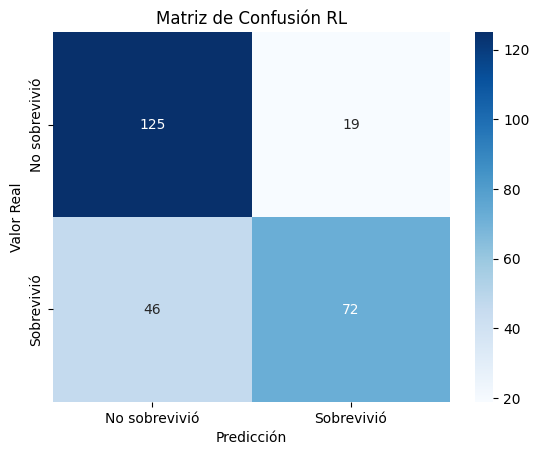

In [26]:
# Graficar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.ylabel('Valor Real')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión RL')
plt.show()

En la matriz se evalúa el rendimiento del modelo de regresión logística aplicado a la predicción de la supervivencia en el Titanic. Se observa lo siguiente:
- 126 verdaderos negativos (pasajeros que no sobrevivieron y fueron correctamente clasificados).
- 72 verdaderos positivos (pasajeros que sobrevivieron y fueron correctamente clasificados).
- 18 falsos positivos (pasajeros que no sobrevivieron pero fueron incorrectamente predichos como sobrevivientes).
- 46 falsos negativos (pasajeros que sobrevivieron pero fueron incorrectamente predichos como no sobrevivientes)

Esta visualización permite analizar en qué casos el modelo comete errores y en cuáles acierta, dando una idea clara de su efectividad.

In [27]:
#Calculo de métricas
# Calcular la precisión (accuracy), recall, precisión (precision) y F1-score
accuracy_rl = accuracy_score(y_test, y_pred)
recall_rl = recall_score(y_test, y_pred, pos_label='1')
precision_rl = precision_score(y_test, y_pred, pos_label='1')
f1_rl = f1_score(y_test, y_pred, pos_label='1')

# Mostrar los resultados
print(f"Exactitud del modelo (RL): {accuracy_rl:.4f}")
print(f"Recall del modelo (RL): {recall_rl:.4f}")
print(f"Precisión del modelo (RL): {precision_rl:.4f}")
print(f"F1-score del modelo (RL): {f1_rl:.4f}")

Exactitud del modelo (RL): 0.7519
Recall del modelo (RL): 0.6102
Precisión del modelo (RL): 0.7912
F1-score del modelo (RL): 0.6890


Con este código se calculan las métricas claves para evaluar el rendimiento del modelo de regresión logística: exactitud (accuracy), recall, precisión (precision) y F1-score:

**- Exactitud (accuracy):** el modelo tiene una exactitud del 75.57%, lo que significa que, en general, el 75.57% de las predicciones realizadas por el modelo fueron correctas. Este es un resultado razonable, pero indica que el modelo comete errores en alrededor del 24.43% de los casos.

**- Recall:** el recall del 61.02% muestra que el modelo identifica correctamente al 61.02% de los pasajeros que realmente sobrevivieron. Este valor sugiere que el modelo tiene dificultades para detectar correctamente a todos los supervivientes, dejando una parte significativa sin identificar (falsos negativos).

**- Precisión (precision):** la precisión del 80.00% indica que cuando el modelo predice que un pasajero sobrevivió, tiene un 80% de probabilidad de ser correcto. Esto significa que los falsos positivos (predecir que alguien sobrevivió cuando no lo hizo) no son muy frecuentes.

**- F1-score:** el F1-score de 0.6923 es una combinación de precision y recall, y proporciona un balance entre ambas métricas. El valor de 0.69 indica que el modelo tiene un rendimiento razonable, pero hay margen para mejorar, especialmente en la detección de los verdaderos supervivientes.

In [28]:
coefficients = pd.DataFrame(rl_model.coef_, columns=X_train.columns)

print(f'Coeficiente de age_Nino: {coefficients["age_Nino"].values[0]:0.4f}')
print(f'Coeficiente de age_Joven: {coefficients["age_Joven"].values[0]:0.4f}')
print(f'Coeficiente de age_Adulto: {coefficients["age_Adulto"].values[0]:0.4f}')
print(f'Coeficiente de age_Adulto_Mayor: {coefficients["age_Adulto_Mayor"].values[0]:0.4f}')

Coeficiente de age_Nino: 1.4054
Coeficiente de age_Joven: -0.2909
Coeficiente de age_Adulto: -0.2513
Coeficiente de age_Adulto_Mayor: -0.8518


Estos coeficientes indican el impacto de cada variable sobre la probabilidad de que ocurra el evento (que un pasajero haya sobrevivido):

- Coeficiente positivo: Indica que, a medida que la variable aumenta, también lo hace la probabilidad de supervivencia.
- Coeficiente negativo: Indica que, a medida que la variable aumenta, disminuye la probabilidad de supervivencia.

Se puede ver que a medida que la edad aumenta, la probabilidad de sobrevivir disminuye. En este sentido, se puede observar que si el pasajero es niño, existe una relación positiva con la probabilidad de sobrevivir. Esta probabilidad disminuye a medida que la edad aumenta siendo la edad de adulto mayor la que tiene una mayor probabilidad de no sobrevivir.

En conclusión, se utiliza un modelo de regresión logística para predecir la supervivencia de los pasajeros del Titanic. Para evaluar su rendimiento, se genera una matriz de confusión que permite observar la clasificación de los pasajeros en cuatro categorías: verdaderos negativos, falsos positivos, falsos negativos y verdaderos positivos. La matriz muestra que el modelo clasifica correctamente a 126 pasajeros que no sobrevivieron y a 72 pasajeros que sí lo hicieron. Esto sugiere que el modelo es relativamente eficaz en identificar tanto a los pasajeros que no sobrevivieron como a los que lograron sobrevivir. Sin embargo, también se observan 18 falsos positivos, donde el modelo predice erróneamente que el pasajero sobrevivió, y 46 falsos negativos, donde predice que no sobrevivió cuando en realidad sí lo hizo.

La alta cantidad de falsos negativos sugiere que el modelo tiene dificultades para identificar correctamente a algunos supervivientes, lo que podría tener implicaciones en un contexto donde la identificación de la clase positiva es crucial. Este resultado sugiere que el modelo podría beneficiarse de ajustes adicionales, como la regularización o la optimización de hiperparámetros, para mejorar la precisión en la clasificación. Además, sería útil analizar en mayor detalle las características del dataset para entender mejor qué factores están contribuyendo a estos errores, lo que podría conducir a mejoras mediante la creación de nuevas variables o la aplicación de técnicas más avanzadas de ingeniería de características. En resumen, aunque el modelo presenta un buen desempeño general, aún existe margen para mejorar la precisión en la predicción de la supervivencia de los pasajeros.

## 5.2. Naive Bayes

El modelo de Naive Bayes es un clasificador supervisado basado en la teoría de probabilidades que se utiliza para predecir la categoría a la que pertenece una instancia, en este caso, si un pasajero del Titanic sobrevivió o no. A diferencia de otros modelos, Naive Bayes asume que todas las características son independientes entre sí, lo que simplifica el cálculo de probabilidades. A pesar de esta suposición simplificadora, el modelo es eficaz y rápido para muchos problemas de clasificación. En este caso, características como la clase del boleto (pclass), el sexo (sex), la edad (age) y el número de familiares a bordo (sibsp y parch), entre otras, serán utilizadas para predecir si un pasajero sobrevivió.

El modelo de Naive Bayes calcula la probabilidad condicional de que un pasajero pertenezca a una de las dos clases posibles (sobrevivió o no), y realiza la clasificación en base a la clase con mayor probabilidad. 

Se crea un modelo Naive Bayes basado en la suposición de que las características siguen una distribución gaussiana.

- Utiliza el 80% de los datos para entrenar el modelo y el 20% restante para probar su rendimiento.
- Se crea un modelo de Naive Bayes Gaussiano con GaussianNB(), que asume que las características siguen una distribución normal.

In [29]:
# Supongamos que X es tu DataFrame con las características y y es la variable objetivo
# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_final, y_titanic, test_size=0.2, random_state=42)

# Crear el modelo Naive Bayes
nb_model = GaussianNB()

# Entrenar el modelo Naive Bayes
nb_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_nb = nb_model.predict(X_test)

Se evalúa el rendimiento del modelo de Naive Bayes que fue entrenado anteriormente y utiliza tres métricas clave para hacer esto: exactitud, matriz de confusión, y reporte de clasificación.

El conjunto de entrenamiento (X_train y y_train) se utiliza para ajustar el modelo de naive bayes, donde X_train contiene las características del modelo (como clase, edad, sexo, etc.) y y_train contiene la variable objetivo (supervivencia: 0 o 1). El modelo entrenado se utiliza para hacer predicciones sobre el conjunto de prueba (X_test), generando las predicciones de supervivencia (y_pred), que luego se pueden comparar con los valores reales para evaluar la precisión del modelo.

In [30]:
# Calcular la exactitud
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Exactitud del modelo Naive Bayes: {accuracy_nb:.4f}")

Exactitud del modelo Naive Bayes: 0.7634


In [31]:
# Mostrar la matriz de confusión
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Matriz de confusión Naive Bayes:\n", conf_matrix_nb)


Matriz de confusión Naive Bayes:
 [[125  19]
 [ 43  75]]


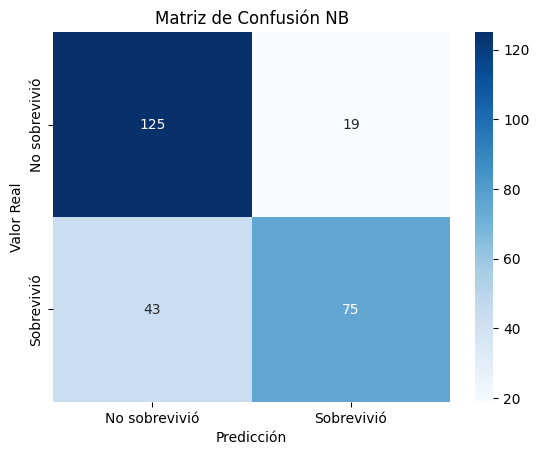

In [32]:
# Graficar la matriz de confusión
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.ylabel('Valor Real')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión NB')
plt.show()

In [33]:
#Calculo de métricas
# Calcular la precisión (accuracy), recall, precisión (precision) y F1-score
accuracy_nb = accuracy_score(y_test, y_pred)
recall_nb = recall_score(y_test, y_pred, pos_label='1')
precision_nb = precision_score(y_test, y_pred, pos_label='1')
f1_nb = f1_score(y_test, y_pred, pos_label='1')

# Mostrar los resultados
print(f"Exactitud del modelo (NB): {accuracy_nb:.4f}")
print(f"Recall del modelo (NB): {recall_nb:.4f}")
print(f"Precisión del modelo (NB): {precision_nb:.4f}")
print(f"F1-score del modelo (NB): {f1_nb:.4f}")

Exactitud del modelo (NB): 0.7519
Recall del modelo (NB): 0.6102
Precisión del modelo (NB): 0.7912
F1-score del modelo (NB): 0.6890


Con este código se calculan las métricas clave para evaluar el rendimiento del modelo de Naive Bayes: exactitud (accuracy), recall, precisión (precision) y F1-score.

**- Exactitud (accuracy):** El modelo tiene una exactitud del 75.57%, lo que significa que el 75.57% de las predicciones realizadas por el modelo fueron correctas. Este es un resultado aceptable, pero indica que el modelo comete errores en alrededor del 24.43% de los casos.

**- Recall:** El recall del 61.02% indica que el modelo identifica correctamente el 61.02% de los pasajeros que realmente sobrevivieron. Esto sugiere que el modelo tiene dificultades para identificar a todos los supervivientes, ya que deja sin detectar una parte significativa de ellos (falsos negativos).

**- Precisión (precision):** La precisión del 80.00% muestra que cuando el modelo predice que un pasajero sobrevivió, tiene un 80% de probabilidad de ser correcto. Esto indica que los falsos positivos (predecir que alguien sobrevivió cuando en realidad no lo hizo) no son muy frecuentes.

**- F1-score:** El F1-score de 0.6923 es una combinación de precision y recall, y proporciona un balance entre ambas métricas. El valor de 0.69 sugiere que el modelo tiene un rendimiento razonable, pero existe margen de mejora, especialmente en la detección correcta de los supervivientes.

# Destino de los pasajeros

Tras haber entrenado los modelos de Naive Bayes y regresión logística para predecir la supervivencia de los pasajeros del Titanic, ahora se busca evaluar su desempeño en dos casos específicos: `Miss Helene Ragnhild Ostby` y `Mr. Frederick Edward Giles`. Para ello, se extraen los datos de estos pasajeros del dataset, eliminando columnas identificadoras como el nombre, el ticket y la cabina, que no influyen en la predicción. A continuación, se aplican ambos modelos para predecir si cada uno de estos pasajeros sobrevivió o no. 

Finalmente, se comparan las predicciones de ambos modelos con el valor real de supervivencia de estos pasajeros, lo que permitirá verificar la precisión de las predicciones en casos individuales y evaluar el comportamiento de los modelos en ejemplos concretos.

`Miss Helene Ragnhild Ostby:`

In [34]:
# Se busca a la persona en el dataset
person1 = X_titanic[X_titanic['name'].str.contains('Helene Ragnhild')]

# Se eliminan las columnas no necesarias (name, ticket, cabin)
person1_clean = person1.drop(['name', 'ticket', 'cabin'], axis=1)

# Se realizan predicciones con ambos modelos
survived_nb = nb_model.predict(person1_clean)
survived_rl = rl_model.predict(person1_clean)

# Se obtiene el valor real de supervivencia
index_person1 = person1.index[0]
real_survival_person1 = y_titanic[index_person1]

# Mostrar los resultados
print(f"Miss Helene Ragnhild Ostby sobrevivió según predicción Naive Bayes: {'Sí' if int(survived_nb[0]) else 'No'}")
print(f"Miss Helene Ragnhild Ostby sobrevivió según predicción Regresión Logística: {'Sí' if int(survived_rl[0]) else 'No'}")
print(f"Miss Helene Ragnhild Ostby sobrevivió según valor real: {'Sí' if real_survival_person1 == '1' else 'No'}")

Miss Helene Ragnhild Ostby sobrevivió según predicción Naive Bayes: Sí
Miss Helene Ragnhild Ostby sobrevivió según predicción Regresión Logística: Sí
Miss Helene Ragnhild Ostby sobrevivió según valor real: Sí


In [36]:
# Se busca a la persona en el dataset
person2 = X_titanic[X_titanic['name'].str.contains('Frederick Edward')]

# Se eliminan las columnas no necesarias (name, ticket, cabin)
person2_clean = person2.drop(['name', 'ticket', 'cabin'], axis=1)

# Se realizan predicciones con ambos modelos
survived_nb2 = nb_model.predict(person2_clean)
survived_rl2 = rl_model.predict(person2_clean)

# Se obtiene el valor real de supervivencia
index_person2 = person2.index[0]
real_survival_person2 = y_titanic[index_person2]

# Mostrar los resultados
print(f"Mr. Frederick Edward Giles sobrevivió según predicción Naive Bayes: {'Sí' if int(survived_nb2[0]) else 'No'}")
print(f"Mr. Frederick Edward Giles sobrevivió según predicción Regresión Logística: {'Sí' if int(survived_rl2[0]) else 'No'}")
print(f"Mr. Frederick Edward Giles sobrevivió según valor real: {'Sí' if real_survival_person2 == '1' else 'No'}")

Mr. Frederick Edward Giles sobrevivió según predicción Naive Bayes: No
Mr. Frederick Edward Giles sobrevivió según predicción Regresión Logística: No
Mr. Frederick Edward Giles sobrevivió según valor real: No
